# **Importa bibliotecas**

In [1]:
import xarray as xr
import time
import proplot as pplt
import salem
import matplotlib
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import numpy as np
import calendar

import warnings
warnings.filterwarnings("ignore")

# **Leitura dos dados**
CHIRPS `MENSAL`
1. Site: https://catalog.data.gov/dataset/chirps-version-2-0-precipitation-global-0-05a-monthly-1981-present
2. url: https://coastwatch.pfeg.noaa.gov/erddap/griddap/chirps20GlobalMonthlyP05

In [2]:
%%time

# área e período dos dados
lon_min, lon_max , lat_min, lat_max, time_min, time_max = -51.0, -39.8, -22.9, -14.2, '1992-01-01', '2022-12-31'

# leitura do dado
chuva_por_mes = xr.open_dataset('https://coastwatch.pfeg.noaa.gov/erddap/griddap/chirps20GlobalMonthlyP05') 

# recorta para região 
chuva_por_mes = chuva_por_mes.sel(longitude=slice(lon_min, lon_max), 
                                  latitude=slice(lat_min, lat_max))\
                             .sel(time=slice(time_min, time_max))

# mostra o dado
chuva_por_mes

CPU times: total: 0 ns
Wall time: 4.4 s


<xarray.Dataset>
Dimensions:    (time: 372, latitude: 174, longitude: 224)
Coordinates:
  * time       (time) datetime64[ns] 1992-01-01 1992-02-01 ... 2022-12-01
  * latitude   (latitude) float32 -22.88 -22.83 -22.77 ... -14.33 -14.28 -14.23
  * longitude  (longitude) float32 -50.98 -50.93 -50.88 ... -39.93 -39.88 -39.82
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/32)
    _NCProperties:             version=2,netcdf=4.7.1,hdf5=1.10.5
    acknowledgements:          The Climate Hazards Group InfraRed Precipitati...
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             pete@geog.ucsb.edu
    creator_name:              Pete Peterson
    ...                        ...
    summary:                   This dataset has monthly averages of the Clima...
    time_coverage_end:         2023-08-01T00:00:00Z
    time_coverage_start:       1981-01-01T00:00:00Z
    title:                     CHIRPS Version 2.0, Precipitation, Global, 0.0...
    version:                   2.0
    Westernmost_Easting:       -179.975

# **Gráficos básicos**

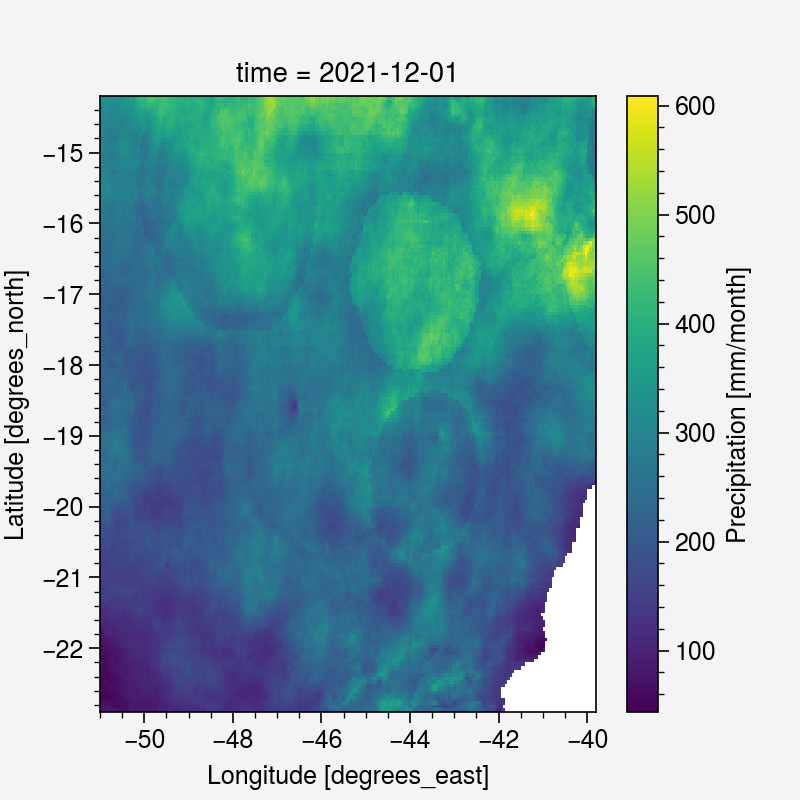

In [3]:
# selecionando o mês pelo NOME
chuva_por_mes['precip'].loc['2021-12-01T00:00:00.000000000'].plot()

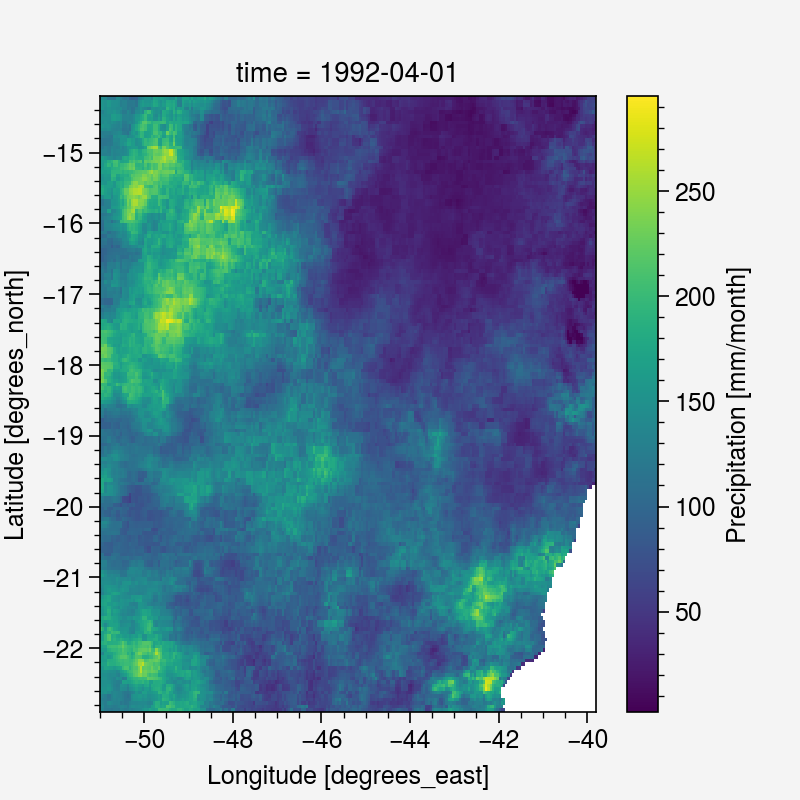

In [4]:
# selecionando o mês pelo ÍNDICE
chuva_por_mes['precip'].isel(time=3).plot()

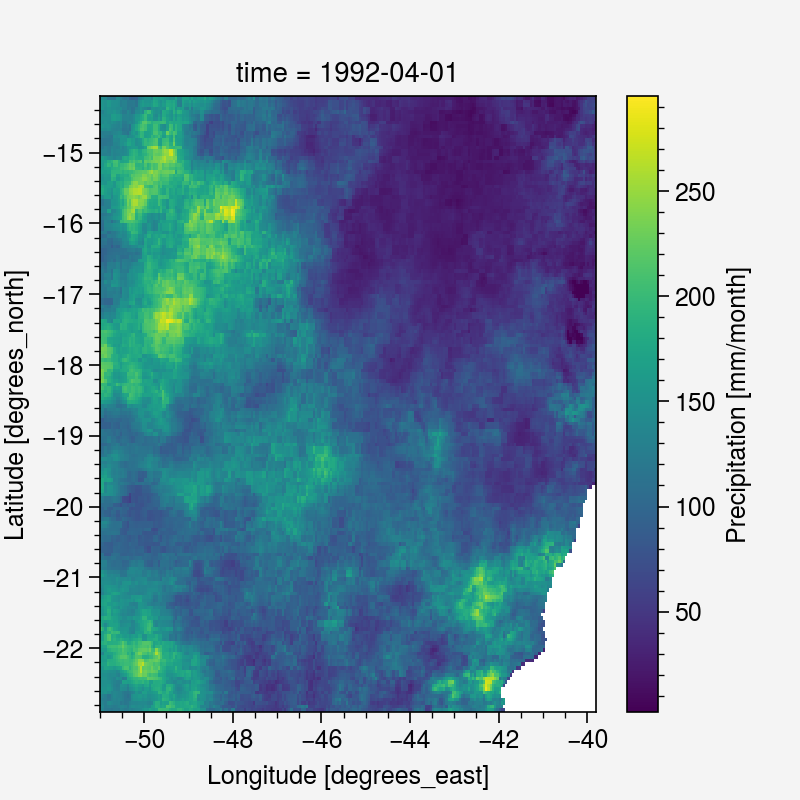

In [5]:
# selecionando o mês pelo ÍNDICE da matriz
chuva_por_mes['precip'][3, :, :].plot()

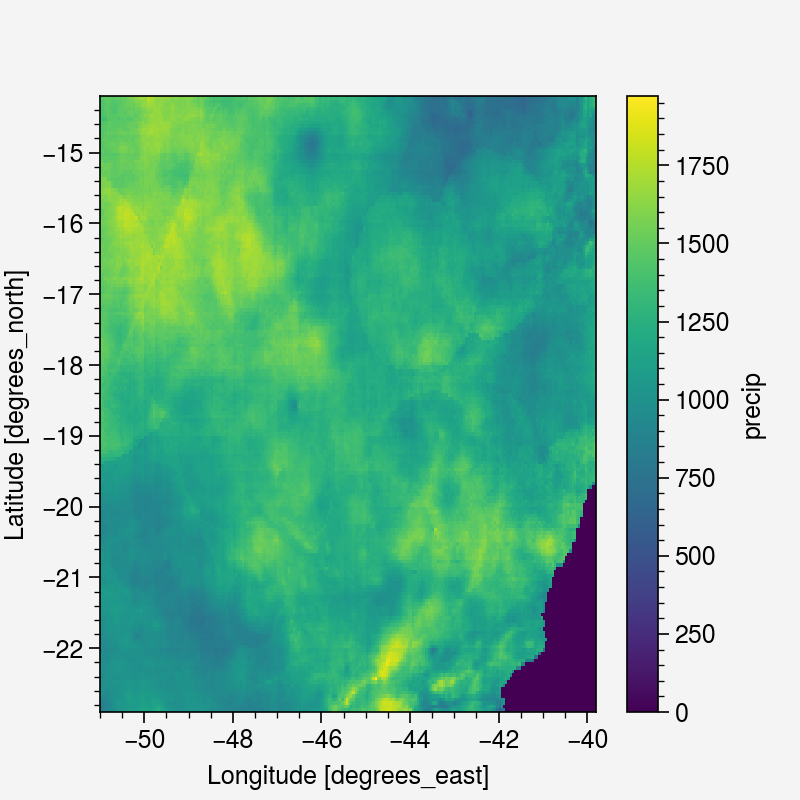

In [6]:
# fazendo uma soma no tempo
chuva_por_mes['precip'].loc['2021-01-01': '2021-12-31'].sum(dim='time').plot()

# **Carrega shapefiles**

In [7]:
# sigla do estado
sigla_estado = 'MG'

# url
url = 'https://github.com/evmpython/shapefile/raw/main/UFs/'

# nome completo
urL_filename = f'{url}{sigla_estado}/{sigla_estado}_UF_2019.shp'

# leitura do shapefile com a biblioteca SALEM
shp = salem.read_shapefile(urL_filename)

# seleciona os limites da imagem
lonmin, lonmax, latmin, latmax = float(shp['min_x']), float(shp['max_x']), float(shp['min_y']), float(shp['max_y'])
print(lonmin, lonmax)
print(latmin, latmax)

-51.046081811 -39.856828891
-22.92275526 -14.233180666


# **Paleta de cores**

In [8]:
# define as 24 cores da paleta
colors = ["#b4f0f0", "#96d2fa", "#78b9fa", "#3c95f5", "#1e6deb", "#1463d2", "#0fa00f",
          "#28be28", "#50f050", "#72f06e", "#b3faaa", "#fff9aa", "#ffe978", "#ffc13c",
          "#ffa200", "#ff6200", "#ff3300", "#ff1500", "#c00100", "#a50200", "#870000",
          "#653b32"]

# carrega a paleta de cores através do cmap
cmap = matplotlib.colors.ListedColormap(colors)

# seta a cor para valores acima do valor máximo
cmap.set_over('#000000')

# seta a cor para valores abaixo do valor mínimo
cmap.set_under('#aaaaaa')

# **Gráficos completos**: `ANO`

## Cálculos

In [9]:
# leitura do dado
chuva_por_mes = xr.open_dataset('https://coastwatch.pfeg.noaa.gov/erddap/griddap/chirps20GlobalMonthlyP05')\
                  .sel(time=slice('2017-01-01', '2022-12-31'))\
                  .sel(longitude=slice(lonmin, lonmax), latitude=slice(latmin, latmax))

# reamostra o dado
chuva_por_ano = chuva_por_mes['precip'].groupby('time.year').sum('time')

# recorta o dado para região
chuva_por_ano = chuva_por_ano.salem.roi(shape=shp)

# mostra o dado
chuva_por_ano

<xarray.DataArray 'precip' (year: 6, latitude: 173, longitude: 224)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -22.88 -22.83 -22.77 ... -14.38 -14.33 -14.28
  * longitude  (longitude) float32 -51.03 -50.98 -50.93 ... -39.98 -39.93 -39.88
  * year       (year) int64 2017 2018 2019 2020 2021 2022
Attributes:
    colorBarMaximum:  400.0
    colorBarMinimum:  0.0
    ioos_category:    Meteorology
    long_name:        Precipitation
    standard_name:    lwe_precipitation_rate
    time_step:        month
    units:            mm/month
    pyproj_srs:       +proj=longlat +datum=WGS84 +no_defs

## Gráfico

Processando o ano: .... 2017
Processando o ano: .... 2018
Processando o ano: .... 2019
Processando o ano: .... 2020
Processando o ano: .... 2021
Processando o ano: .... 2022


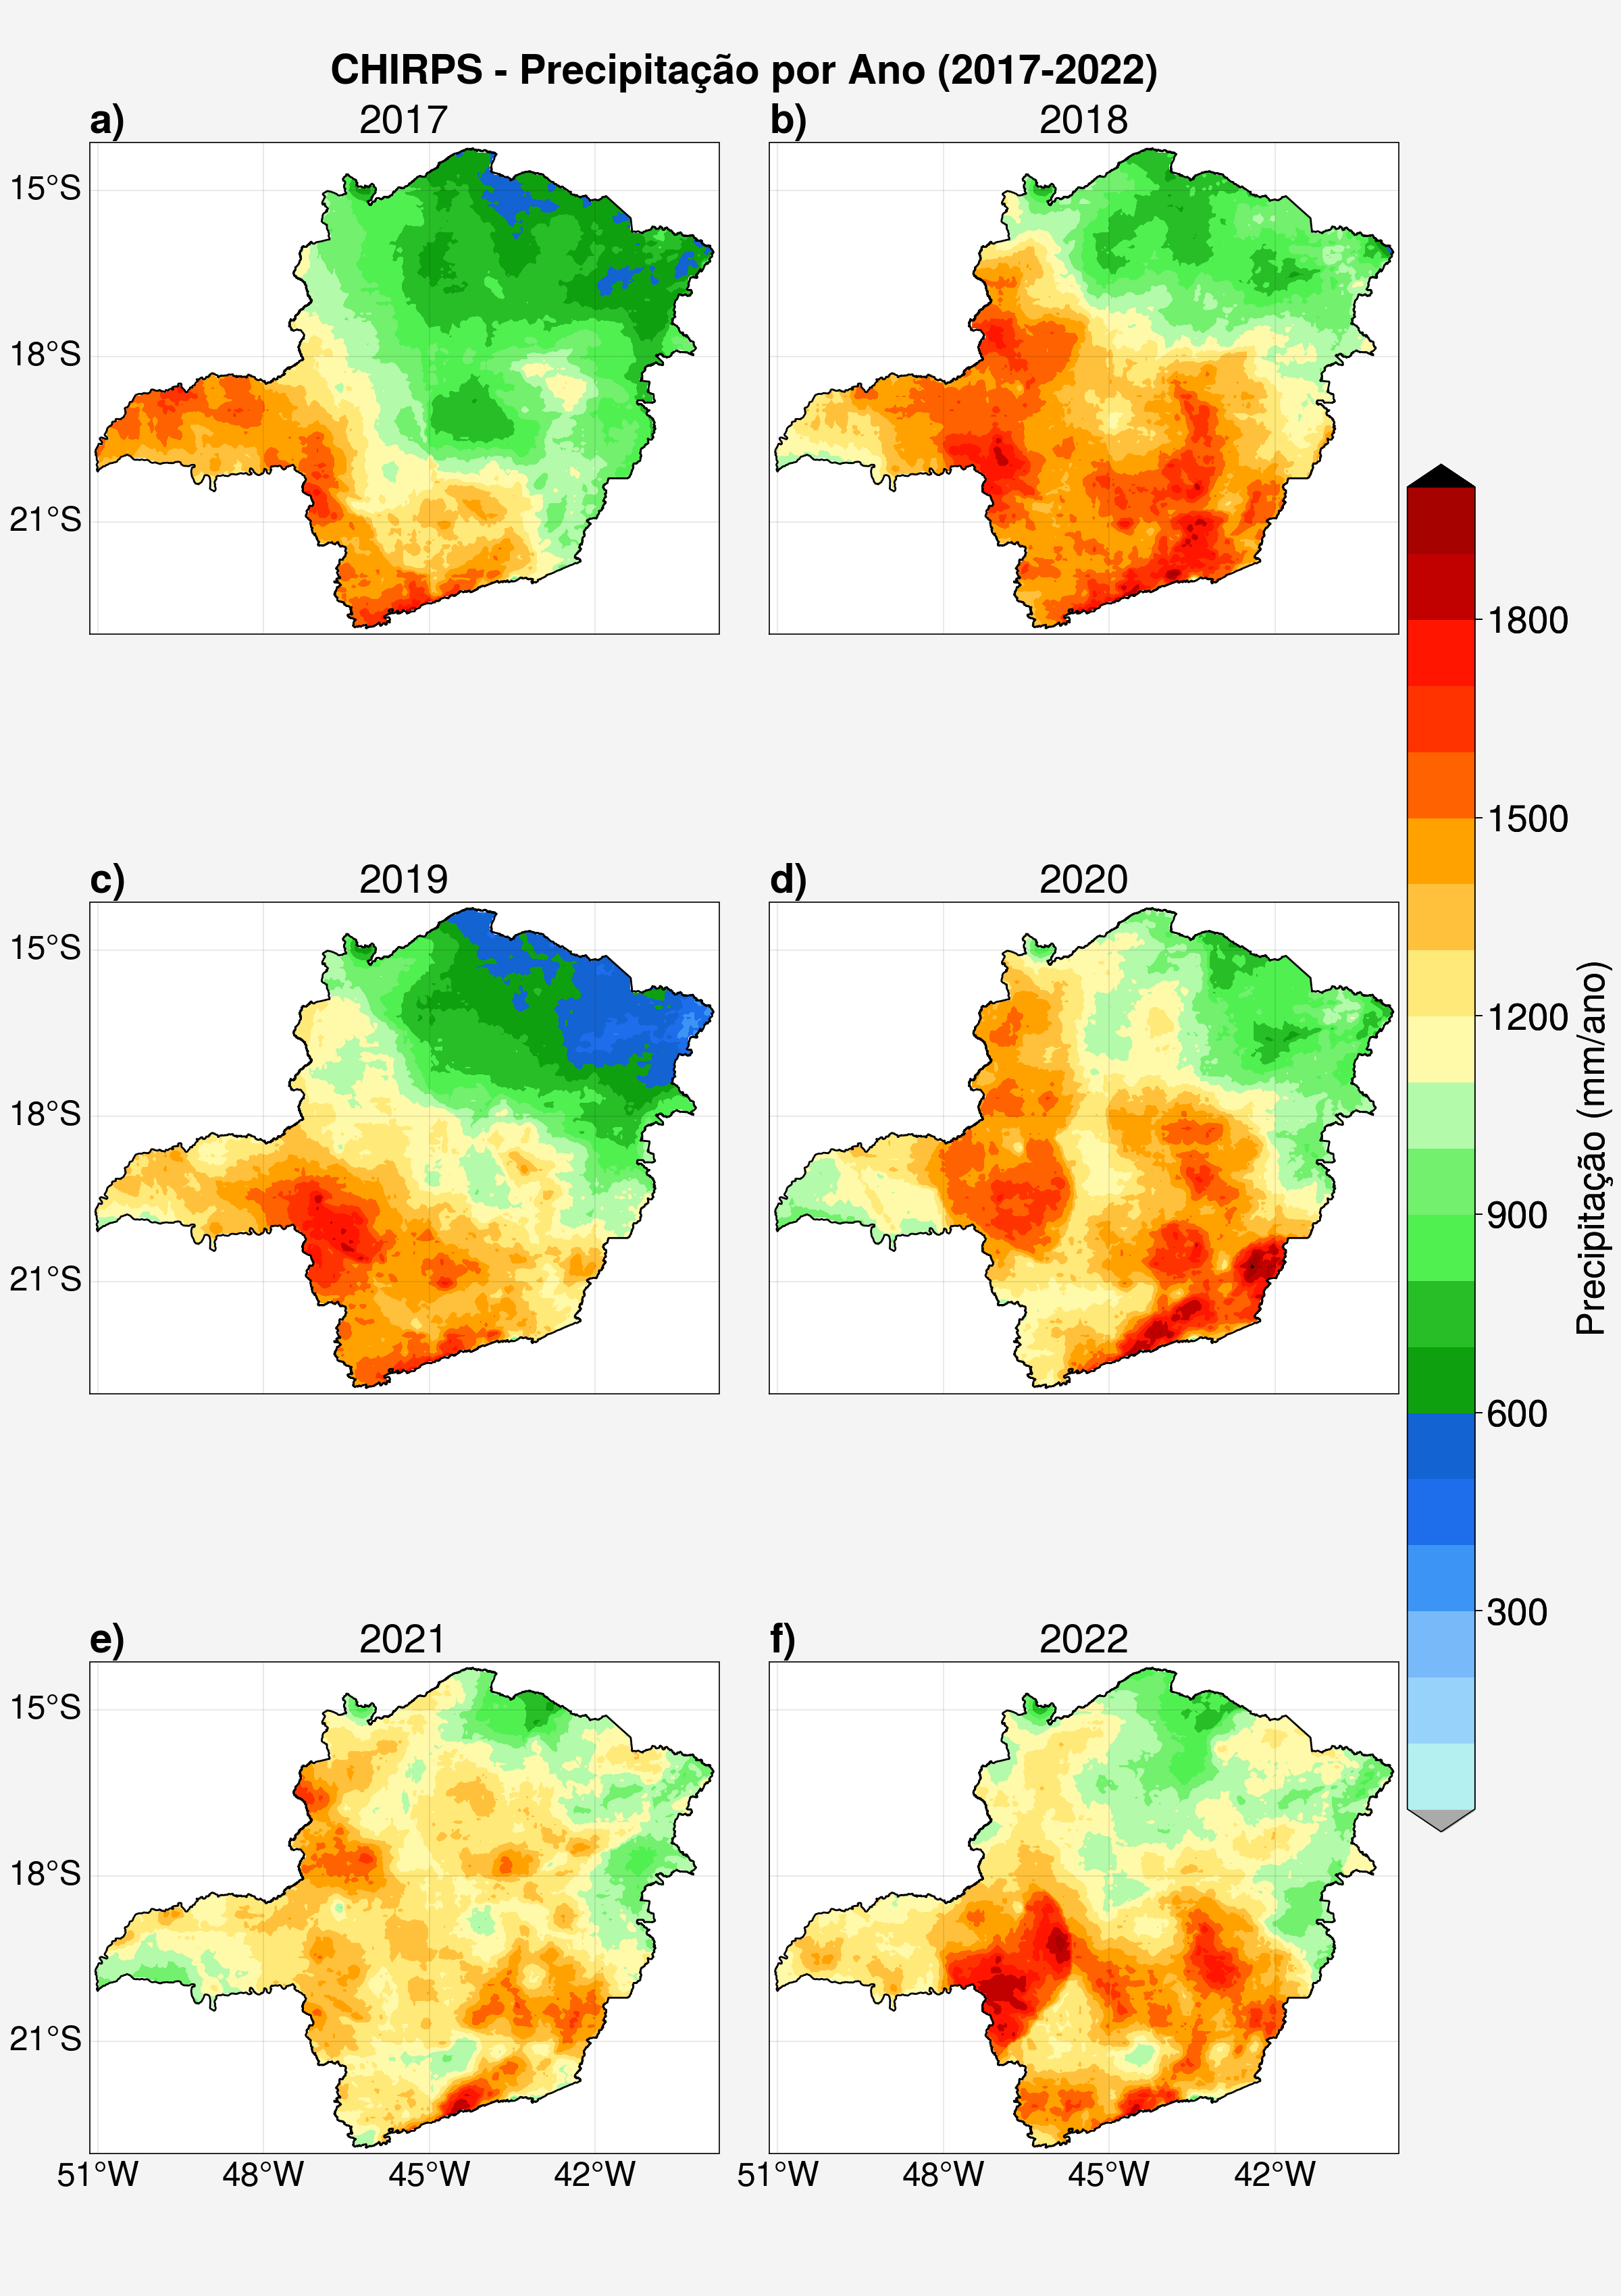

In [10]:
# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(12, 17), nrows=3, ncols=2, tight=True, proj='pcarree', sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          latlines=3, lonlines=3,
          latlim=(latmin-0.10, latmax+0.10), lonlim=(lonmin-0.10, lonmax+0.10),
          suptitle=f'CHIRPS - Precipitação por Ano (2017-2022)',
          abc=True, abcstyle='a)', abcsize=5,
          small='25px', large='30px')

# loop dos anos
for i in range(len(chuva_por_ano)):

  # extrai o nome do ano
  ano = str(chuva_por_ano['year'][i].values)[0:4]

  # exibe na tela o ano que esta sendo processado
  print(f'Processando o ano: .... {ano}')

  # plota figura
  map1 = ax[i].contourf(chuva_por_ano['longitude'],
                        chuva_por_ano['latitude'],
                        chuva_por_ano[i,:,:],
                        cmap=cmap,
                        levels=pplt.arange(0.01, 2000, 100),
                        extend='both')

  # plota titulo de cada figura
  if(i == 0): ax[i].format(title=ano, labels = [True, False, False, False])
  if(i == 2): ax[i].format(title=ano, labels = [True, False, False, False])
  if(i == 1): ax[i].format(title=ano, labels = [False, False, False, False])
  if(i == 3): ax[i].format(title=ano, labels = [False, False, False, False])
  if(i == 4): ax[i].format(title=ano, labels = [True, False, True, False])
  if(i == 5): ax[i].format(title=ano, labels = [False, False, True, False])

  # plota contorno do Estado de MG
  shapefile = list(shpreader.Reader(urL_filename).geometries())
  ax[i].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.0)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', orientation='vertical', label='Precipitação (mm/ano)', ticks=300, ticklabelsize=20, labelsize=20, space=0.5, length=0.60, width=0.5, )

# salva figura
fig.savefig('Fig_3b_1_chirps_por_ano.jpg', transparent=True, dpi=300, bbox_inches="tight", pad_inches=0.1)

Uma outra forma é **retirar** os labels dos eixos das latitudes e longitudes.

Processando o ano: .... 2017
Processando o ano: .... 2018
Processando o ano: .... 2019
Processando o ano: .... 2020
Processando o ano: .... 2021
Processando o ano: .... 2022


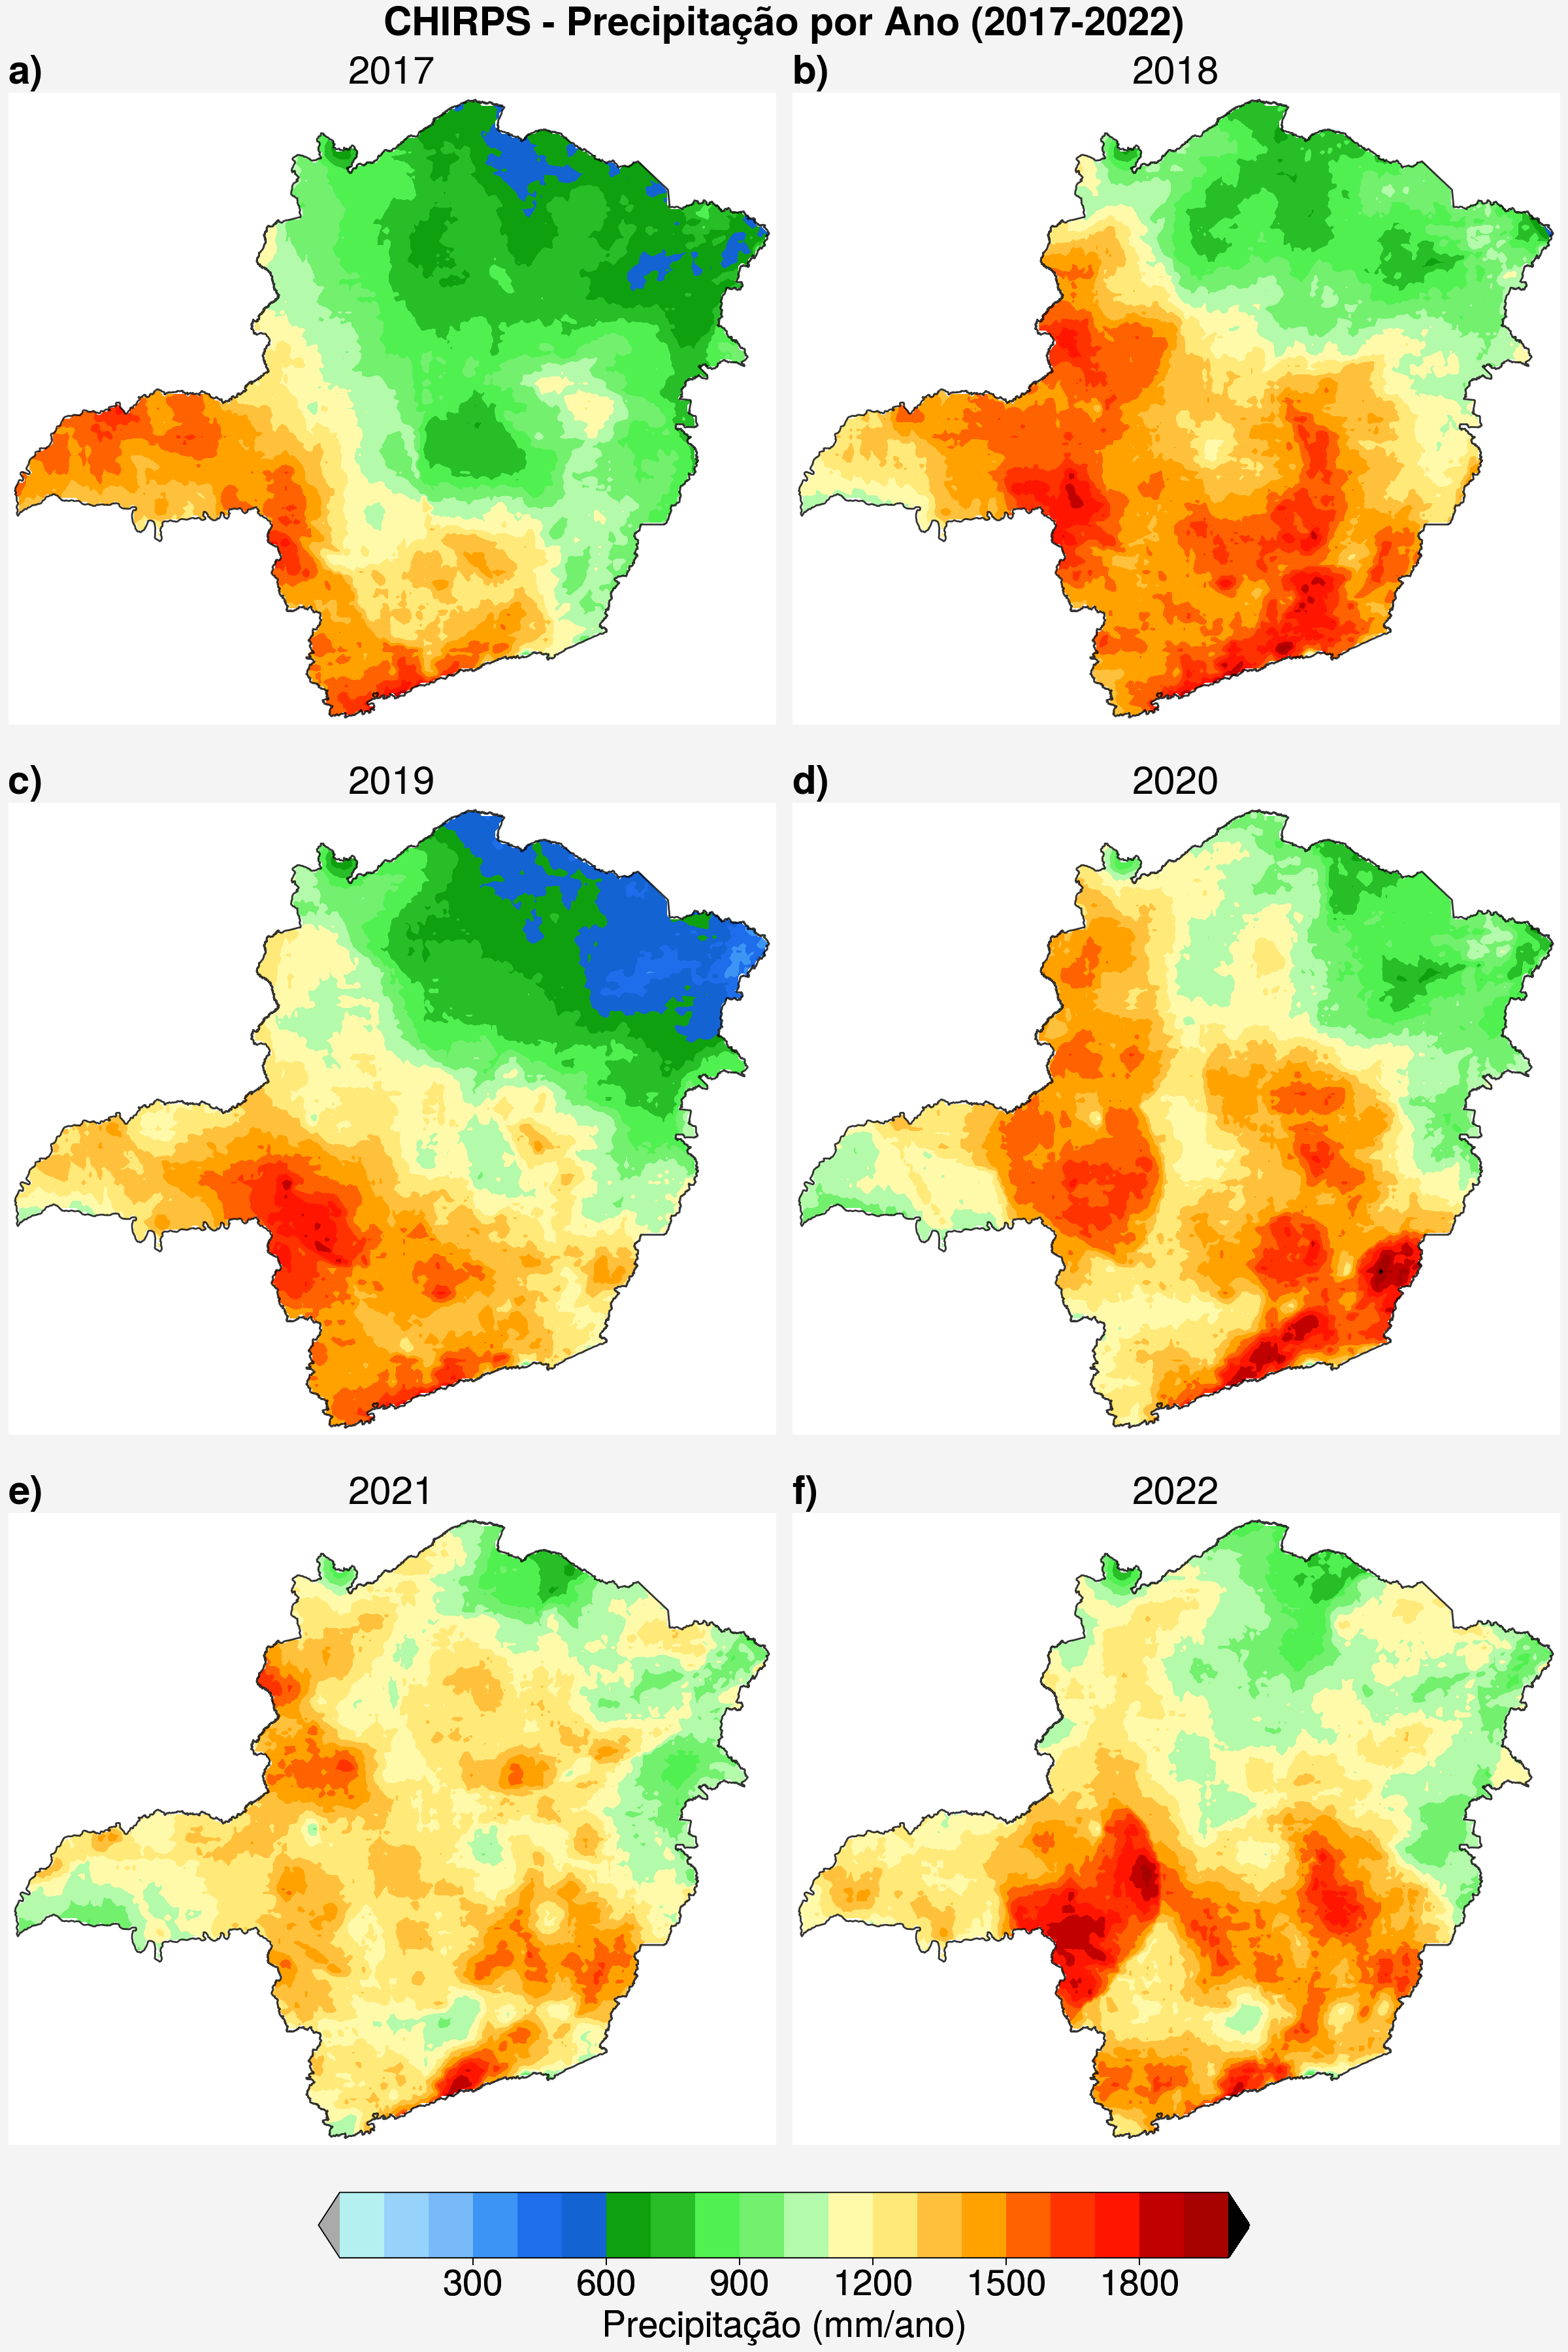

In [11]:
# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(12, 18), nrows=3, ncols=2, tight=True, proj='pcarree', sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          latlines=3, lonlines=3,
          latlim=(latmin-0.10, latmax+0.10), lonlim=(lonmin-0.10, lonmax+0.10),
          suptitle=f'CHIRPS - Precipitação por Ano (2017-2022)',
          abc=True, abcstyle='a)', abcsize=5,
          small='25px', large='30px',
          linewidth=0, grid=False)

# loop dos anos
for i in range(len(chuva_por_ano)):

  # extrai o nome do ano
  ano = str(chuva_por_ano['year'][i].values)[0:4]

  # exibe na tela o ano que esta sendo processado
  print(f'Processando o ano: .... {ano}')

  # plota figura
  map1 = ax[i].contourf(chuva_por_ano['longitude'], 
                        chuva_por_ano['latitude'], 
                        chuva_por_ano[i,:,:],
                        cmap=cmap,
                        levels=pplt.arange(0.01, 2000, 100),
                        extend='both')

  # plota titulo de cada figura
  if(i == 0): ax[i].format(title=ano, labels = False)
  if(i == 2): ax[i].format(title=ano, labels = False)
  if(i == 1): ax[i].format(title=ano, labels = False)
  if(i == 3): ax[i].format(title=ano, labels = False)
  if(i == 4): ax[i].format(title=ano, labels = False)
  if(i == 5): ax[i].format(title=ano, labels = False)

  # plota contorno do Estado de MG
  shp.plot(edgecolor='black', facecolor='none', linewidth=1, alpha=0.8, ax=ax[i])

# plota barra de cores da figura
fig.colorbar(map1, loc='b', label='Precipitação (mm/ano)', ticks=300, ticklabelsize=20, labelsize=20, space=0.5, length=0.60, width=0.5)

# salva figura
fig.savefig('Fig_3b_2_chirps_por_ano_sembordas.jpg', transparent=True, dpi=300, bbox_inches="tight", pad_inches=0.1)

# **Gráficos completos**: `ANUAL`

## Cálculos

In [12]:
# reamostra o dado
chuva_media_anual = chuva_por_ano.mean(dim='year')

# recorta o dado para região
chuva_media_anual = chuva_media_anual.salem.roi(shape=shp)

# mostra o dado
chuva_media_anual

<xarray.DataArray 'precip' (latitude: 173, longitude: 224)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -22.88 -22.83 -22.77 ... -14.38 -14.33 -14.28
  * longitude  (longitude) float32 -51.03 -50.98 -50.93 ... -39.98 -39.93 -39.88
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

## Gráfico

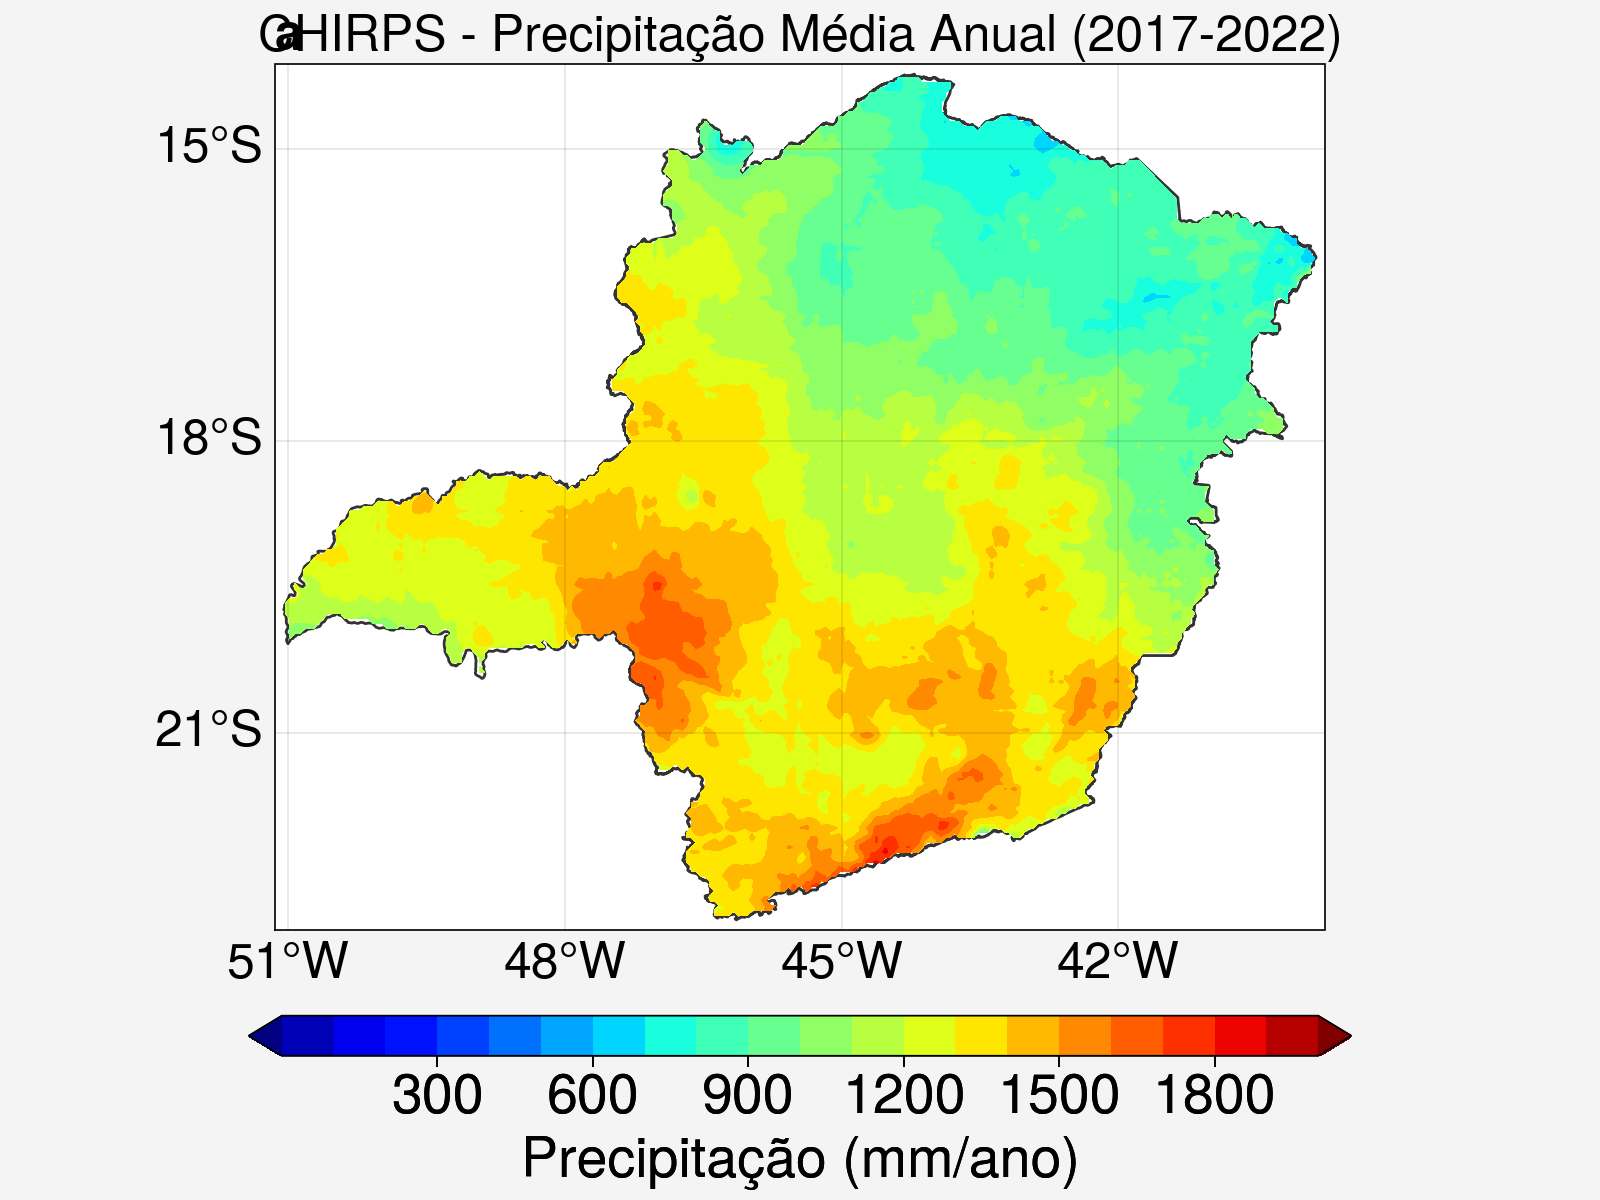

In [13]:
# Plotando a figura
fig, ax = pplt.subplots(figsize=(8,6), tight=True, proj='pcarree')

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=True,
          latlines=3, lonlines=3,
          latlim=(latmin-0.10, latmax+0.10), lonlim=(lonmin-0.10, lonmax+0.10),
          small='25px', large='25px',
          title = f'CHIRPS - Precipitação Média Anual (2017-2022)')

# plota contorno do Estado de MG
shp.plot(edgecolor='black', facecolor='none', linewidth=1, alpha=0.8, ax=ax)

# plota figura
map1 = ax.contourf(chuva_media_anual['longitude'],
                   chuva_media_anual['latitude'],
                   chuva_media_anual[:,:],
                   cmap='jet',
                   levels=pplt.arange(0.01, 2000, 100),
                   extend='both')

# plota barra de cores da figura
fig.colorbar(map1, loc='b', label='Precipitação (mm/ano)', ticks=300, ticklabelsize=20, labelsize=20, length=0.70)

# salva figura
fig.savefig('Fig_3b_3_chirps_media_anual.png', dpi=300)

# **Gráficos completos**: `SAZONAL`

## Cálculos

In [14]:
chuva_por_mes

<xarray.Dataset>
Dimensions:    (time: 72, latitude: 173, longitude: 224)
Coordinates:
  * time       (time) datetime64[ns] 2017-01-01 2017-02-01 ... 2022-12-01
  * latitude   (latitude) float32 -22.88 -22.83 -22.77 ... -14.38 -14.33 -14.28
  * longitude  (longitude) float32 -51.03 -50.98 -50.93 ... -39.98 -39.93 -39.88
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/32)
    _NCProperties:             version=2,netcdf=4.7.1,hdf5=1.10.5
    acknowledgements:          The Climate Hazards Group InfraRed Precipitati...
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             pete@geog.ucsb.edu
    creator_name:              Pete Peterson
    ...                        ...
    summary:                   This dataset has monthly averages of the Clima...
    time_coverage_end:         2023-08-01T00:00:00Z
    time_coverage_start:       1981-01-01T00:00:00Z
    title:                     CHIRPS Version 2.0, Precipitation, Global, 0.0...
    version:                   2.0
    Westernmost_Easting:       -179.975

In [15]:
%%time
# reamostra o dado
chuva_media_sazonal = chuva_por_mes['precip'].groupby("time.season").mean(dim="time")

# recorta o dado para região
chuva_media_sazonal  = chuva_media_sazonal.salem.roi(shape=shp)

# mostra o dado
chuva_media_sazonal

CPU times: total: 844 ms
Wall time: 1min 44s


<xarray.DataArray 'precip' (season: 4, latitude: 173, longitude: 224)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -22.88 -22.83 -22.77 ... -14.38 -14.33 -14.28
  * longitude  (longitude) float32 -51.03 -50.98 -50.93 ... -39.98 -39.93 -39.88
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    colorBarMaximum:  400.0
    colorBarMinimum:  0.0
    ioos_category:    Meteorology
    long_name:        Precipitation
    standard_name:    lwe_precipitation_rate
    time_step:        month
    units:            mm/month
    pyproj_srs:       +proj=longlat +datum=WGS84 +no_defs

## Gráfico

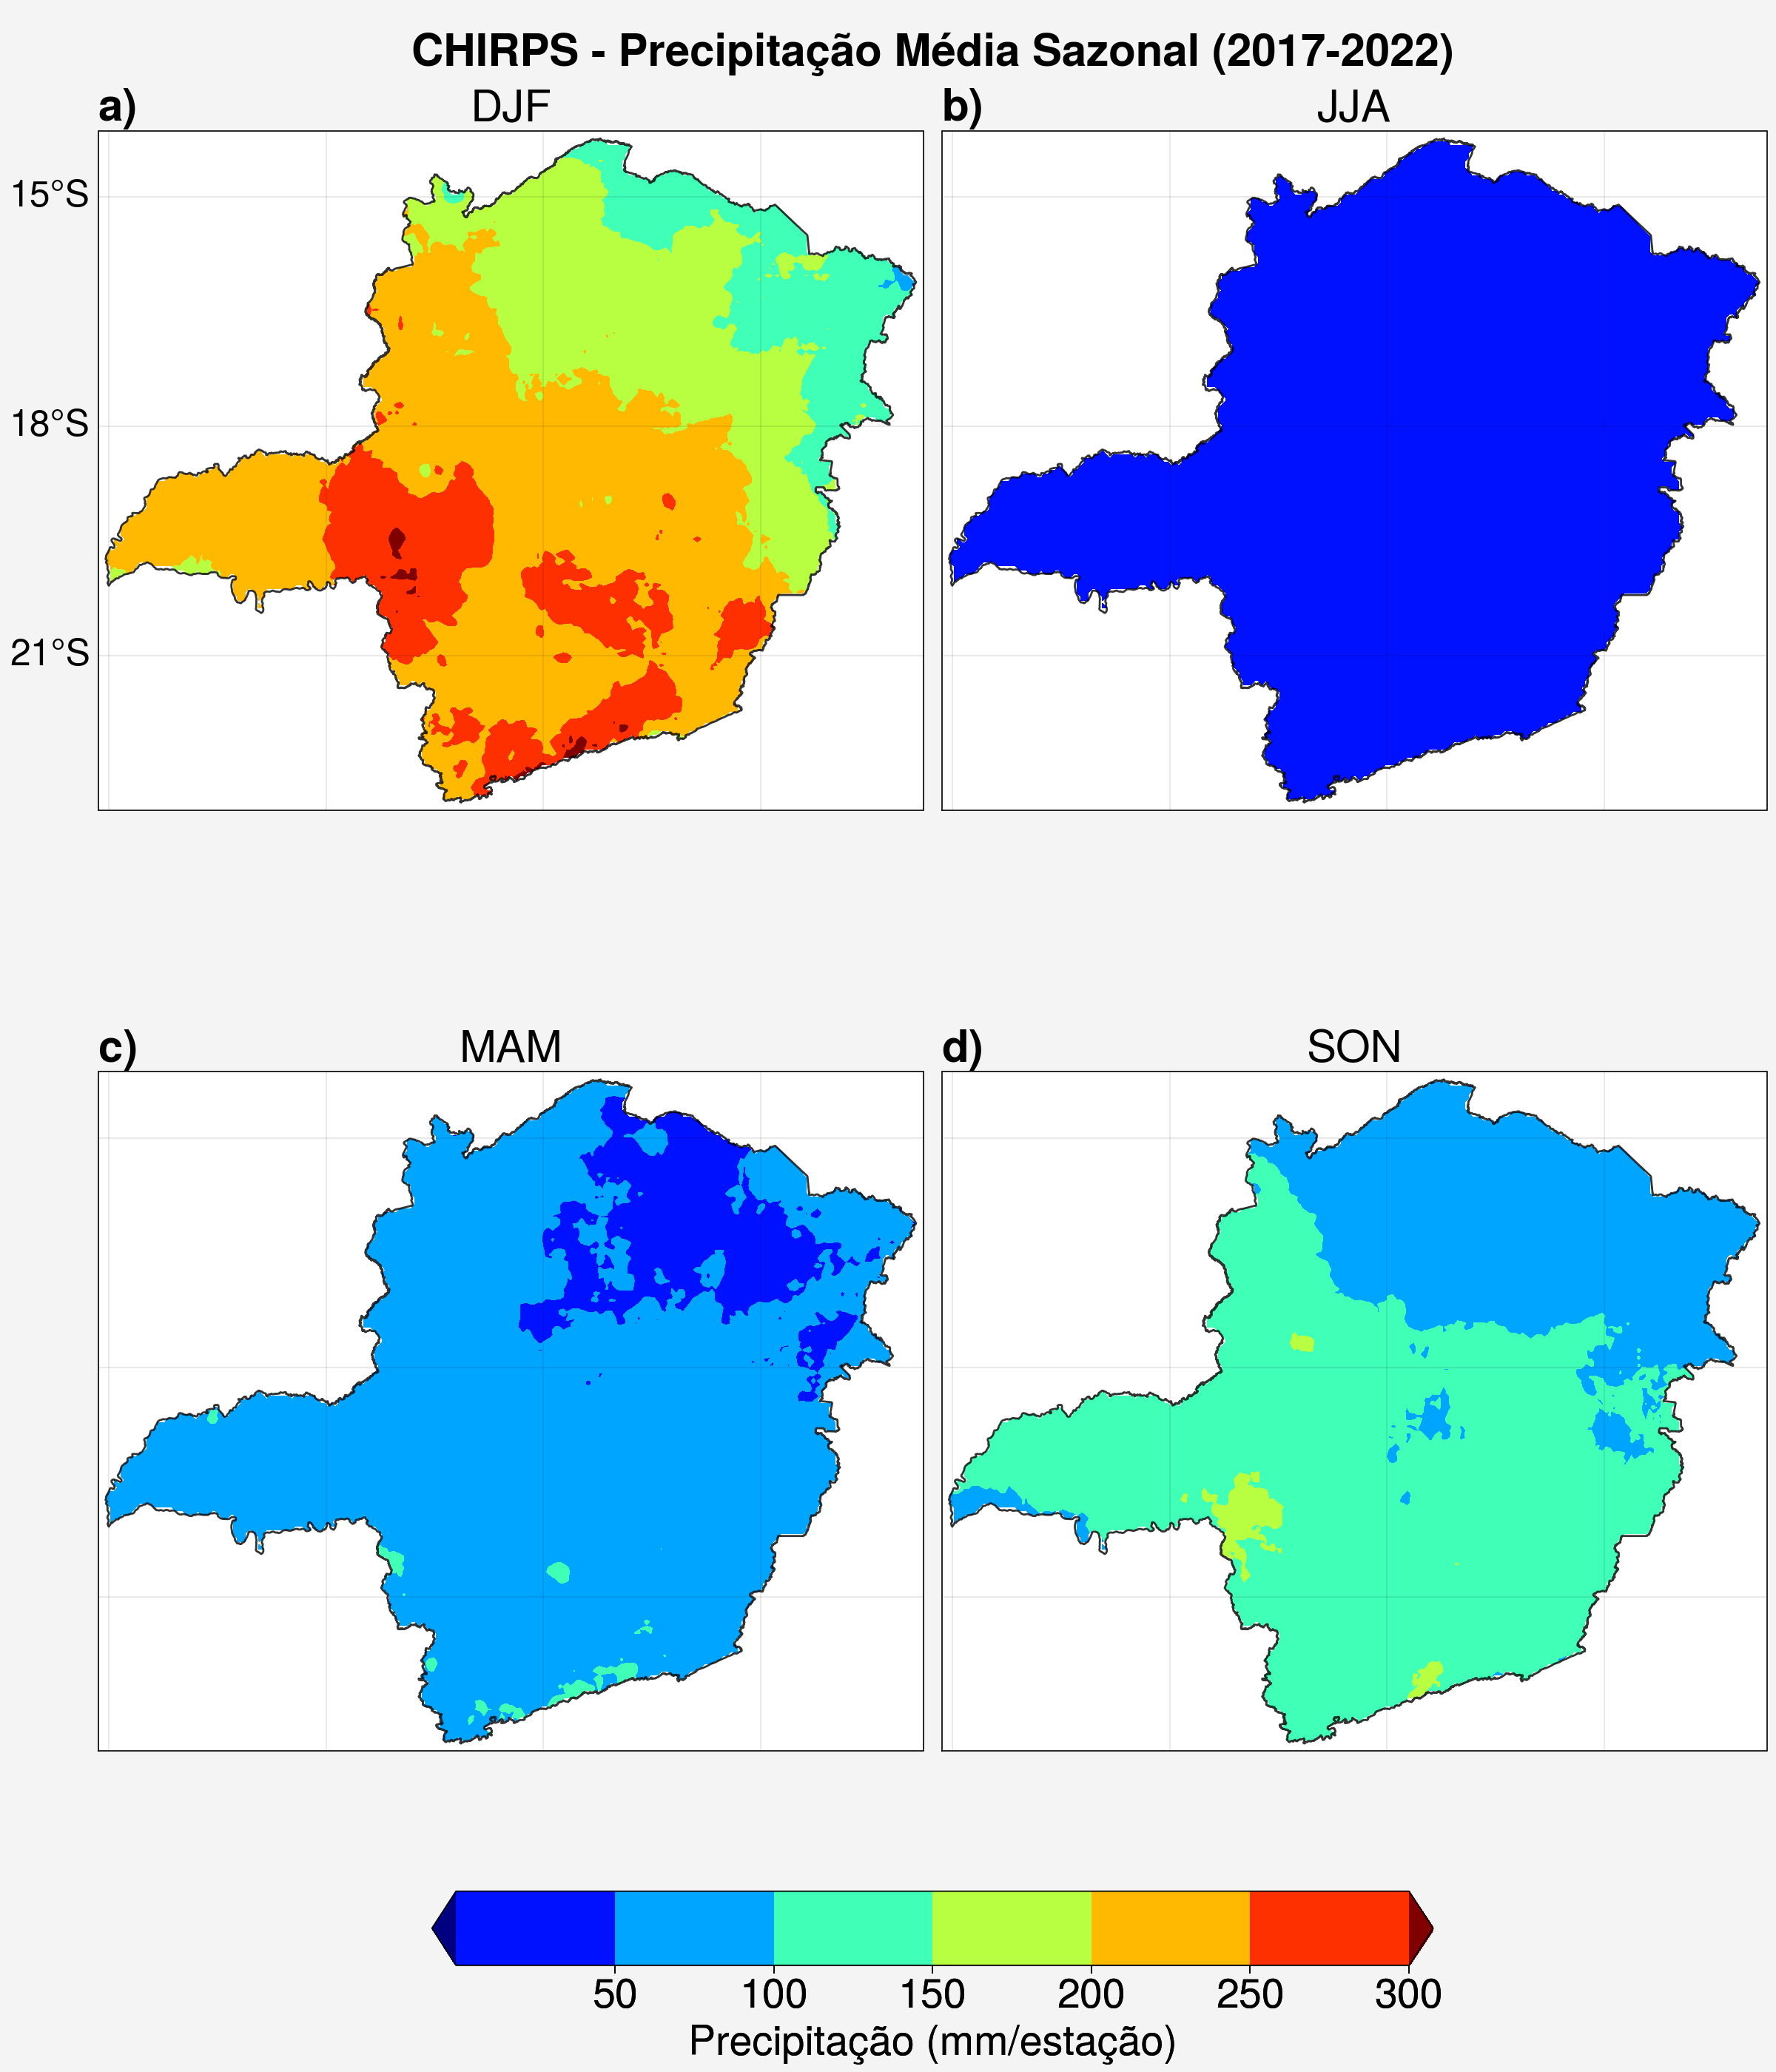

In [16]:
# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(12,14), nrows=2, ncols=2, tight=True, proj='pcarree', sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          latlines=3, lonlines=3,
          latlim=(latmin-0.10, latmax+0.10), lonlim=(lonmin-0.10, lonmax+0.10),
          suptitle=f'CHIRPS - Precipitação Média Sazonal (2017-2022)',
          abc=True, abcstyle='a)', abcsize=5,
          small='25px', large='30px')

# loop das estações
for s in range(len(chuva_media_sazonal)):

    # plota figura
    map1 = ax[s].contourf(chuva_media_sazonal['longitude'],
                          chuva_media_sazonal['latitude'],
                          chuva_media_sazonal[s,:,:],
                          cmap='jet', levels=pplt.arange(0.01, 300, 50),
                          extend='both')

    # plota titulo de cada figura
    if(s == 0): ax[s].format(title=chuva_media_sazonal.season[s].values, labels = [True, False, False, False])
    if(s == 1): ax[s].format(title=chuva_media_sazonal.season[s].values, labels = [False, False, False, False])
    if(s == 2): ax[s].format(title=chuva_media_sazonal.season[s].values, labels = [True, False, True, False])
    if(s == 3): ax[s].format(title=chuva_media_sazonal.season[s].values, labels = [False, False, True, False])

    # plota contorno do Estado de MG
    shp.plot(edgecolor='black', facecolor='none', linewidth=1, alpha=0.8, ax=ax[s])

# plota barra de cores da figura
fig.colorbar(map1, loc='b', label='Precipitação (mm/estação)', ticks=50, ticklabelsize=20, labelsize=20, space=0.5, length=0.60, width=0.5)

# salva figura
fig.savefig('Fig_3b_4_chirps_media_sazonal.jpg', dpi=300)

# **Gráficos completos**: `MENSAL`

## Cálculos

In [ ]:
%%time
# reamostra o dado
chuva_media_mensal = chuva_por_mes['precip'].groupby('time.month').mean(dim='time')

# recorta o dado para região
chuva_media_mensal = chuva_media_mensal.salem.roi(shape=shp)

# mostra o dado
chuva_media_mensal

## Gráfico

In [ ]:
# cria a moldura da figura
fig, ax = pplt.subplots(ncols=3, nrows=4, axheight=3, tight=True, proj='pcarree', sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          latlines=3, lonlines=3,
          latlim=(latmin-0.10, latmax+0.10), lonlim=(lonmin-0.10, lonmax+0.10),
          suptitle=f'CHIRPS - Precipitação Média Mensal (2017-2022)',
          abc=True, abcstyle='a)', abcsize=5,
          small='25px', large='30px')

# loop dos meses
for m in np.arange(0, 12):

    # nome do mês
    mes = str(m+1).zfill(2)

    # plota figura
    if m == 0:
        map1 = ax[m].contourf(chuva_media_mensal['longitude'],
                              chuva_media_mensal['latitude'],
                              chuva_media_mensal[m,:,:],
                              cmap=cmap,
                              levels=pplt.arange(0.01, 300, 50),
                              extend='both')
    else:
        ax[m].contourf(chuva_media_mensal['longitude'],
                       chuva_media_mensal['latitude'],
                       chuva_media_mensal[m,:,:],
                       cmap=cmap,
                       levels=pplt.arange(0.01, 300, 50),
                       extend='both')

    # plota titulo de cada figura
    if (m==1 or m==2 or m==4 or m==5 or m==7 or m==8): ax[m].format(title=calendar.month_name[int(m+1)], labels=False)
    if (m==10 or m==11): ax[m].format(title=calendar.month_name[int(m+1)], labels=[False, False, True, False])
    if (m==0 or m==3 or m==6): ax[m].format(title=calendar.month_name[int(m+1)], labels=[True, False, False, False])
    if (m==9): ax[m].format(title=calendar.month_name[int(m+1)], labels=[True, False, True, False])

    # plota contorno do Estado de MG
    shp.plot(edgecolor='black', facecolor='none', linewidth=1, alpha=0.8, ax=ax[m])

# plota barra de cores da figura
fig.colorbar(map1, loc='r', orientation='vertical', label='Precipitação (mm/mês)', ticks=50, ticklabelsize=20, labelsize=20, space=0.5, length=0.60, width=0.5)

# salva figura
fig.savefig('Fig_3b_5_chirps_media_mensal.jpg', dpi=300)